# Analyze Efficiency and accuracy  on Cluster



The chunks are all on the sample axis. The shape of the data coming into the PCA is `(n_sample, 132651)`.

Information about the nodes (hive) can be found here:

https://docs.pace.gatech.edu/hive/resources/


## Conclusions

???

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from toolz.curried import map as fmap
from toolz.curried import curry

# 8 core 

In [2]:
data = pd.read_csv("job5_shuffled_fullsvd/pace-eightnode_big.csv",index_col=False)

In [3]:
data

,chunks,samples,fit_time,predict_time,r_squared
0,1,2000,140.311,44.221,0.969
1,1,4000,277.955,91.637,0.895
2,1,6000,445.000,145.000,0.959
3,1,8000,608.601,201.108,0.942
4,1,2000,140.840,44.937,0.939
...,...,...,...,...,...
102,48,8000,102.917,34.566,0.936
103,48,2000,28.372,9.416,0.964
104,48,4000,53.556,16.912,0.969
105,48,6000,78.366,23.497,0.973


In [4]:
data2000 = data.loc[data.samples == 2000].groupby('chunks').min()
data4000 = data.loc[data.samples == 4000].groupby('chunks').min()
data6000 = data.loc[data.samples == 6000].groupby('chunks').min()
data8000 = data.loc[data.samples == 8000].groupby('chunks').min()

In [5]:
data2000

,samples,fit_time,predict_time,r_squared
chunks,,,,
1,2000,140.311,44.221,0.939
2,2000,74.856,23.060,0.883
4,2000,39.506,12.433,0.757
8,2000,24.091,7.503,0.948
16,2000,26.686,8.024,0.761
24,2000,26.593,7.969,0.914
32,2000,27.059,8.550,0.776
40,2000,28.171,8.922,0.902
48,2000,27.722,8.695,0.943


In [6]:
data2000.index

Int64Index([1, 2, 4, 8, 16, 24, 32, 40, 48], dtype='int64', name='chunks')

In [7]:
data2000.iloc[:,1]

chunks
1     140.311
2      74.856
4      39.506
8      24.091
16     26.686
24     26.593
32     27.059
40     28.171
48     27.722
Name: fit_time, dtype: float64

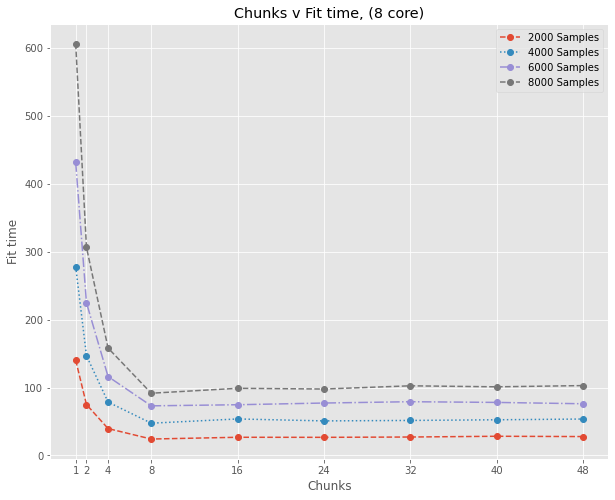

In [8]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (8 core)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 16 Core

In [9]:
data_16 = pd.read_csv("job6_shuffled_fullsvd/pace-sixteennode_big.csv",index_col=False)

data2000_16 = data_16.loc[data_16.samples == 2000].groupby('chunks').min()
data4000_16 = data_16.loc[data_16.samples == 4000].groupby('chunks').min()
data6000_16 = data_16.loc[data_16.samples == 6000].groupby('chunks').min()
data8000_16 = data_16.loc[data_16.samples == 8000].groupby('chunks').min()

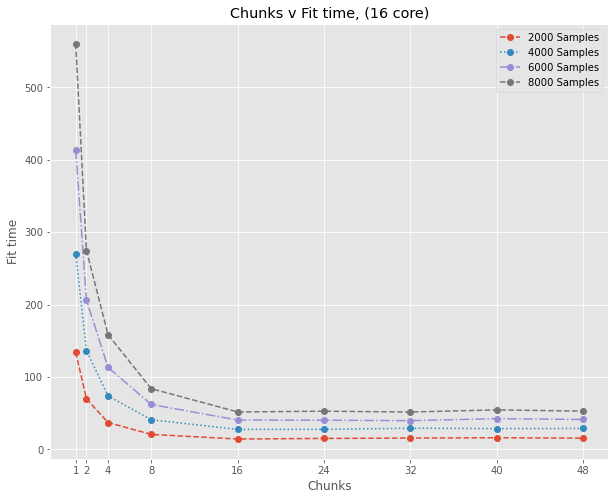

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_16.index, data2000_16.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_16.index, data4000_16.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_16.index, data6000_16.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (16 core)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 24 Core

In [11]:
data_24 = pd.read_csv("job7_shuffled_fullsvd/pace-twentyfournode_big.csv",index_col=False)

data2000_24 = data_24.loc[data_24.samples == 2000].groupby('chunks').min()
data4000_24 = data_24.loc[data_24.samples == 4000].groupby('chunks').min()
data6000_24 = data_24.loc[data_24.samples == 6000].groupby('chunks').min()
data8000_24 = data_24.loc[data_24.samples == 8000].groupby('chunks').min()

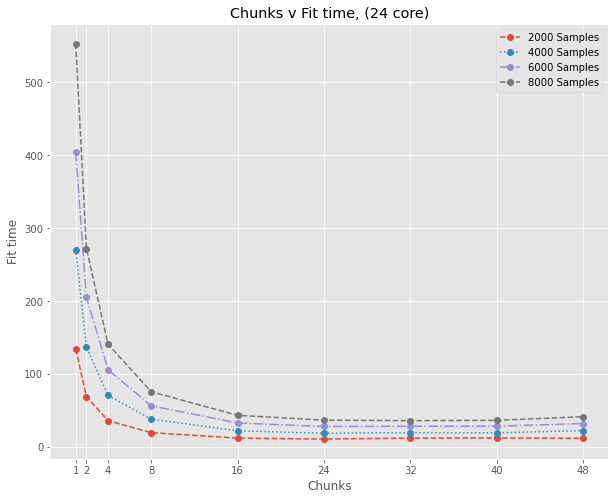

In [12]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (24 core)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

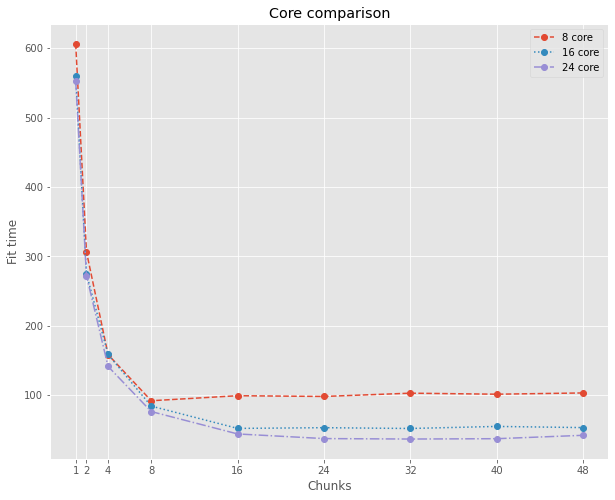

In [13]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index, data8000.iloc[:,1],'o--', label='8 core')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o:', label='16 core')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o-.', label='24 core')
plt.xticks(data2000.index)
plt.title('Core comparison')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

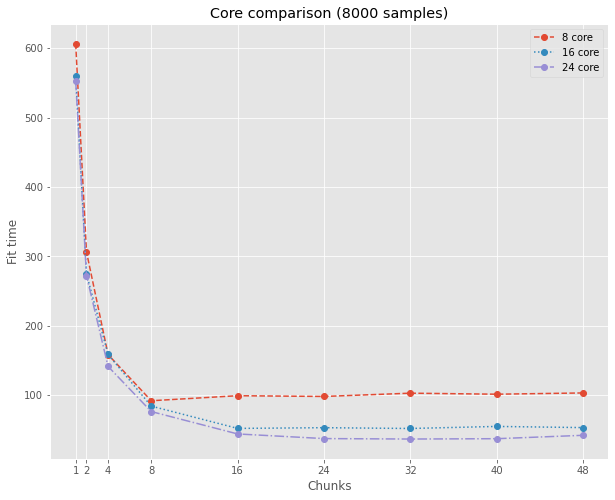

In [14]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index[:], data8000.iloc[:,1],'o--', label='8 core')
plt.plot(data8000_16.index[:], data8000_16.iloc[:,1], 'o:', label='16 core')
plt.plot(data8000_24.index[:], data8000_24.iloc[:,1], 'o-.', label='24 core')
plt.xticks(data2000.index[:])
plt.title('Core comparison (8000 samples)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

In [15]:
data8000.index[4:]

Int64Index([16, 24, 32, 40, 48], dtype='int64', name='chunks')

# Accuracy 

In [16]:
data8000

,samples,fit_time,predict_time,r_squared
chunks,,,,
1,8000,606.516,189.924,0.942
2,8000,306.397,95.711,0.929
4,8000,158.153,49.328,0.868
8,8000,91.577,27.508,0.720
16,8000,98.827,28.978,0.913
24,8000,97.758,30.088,0.934
32,8000,102.495,31.188,0.953
40,8000,101.015,31.935,0.943
48,8000,102.828,32.430,0.844


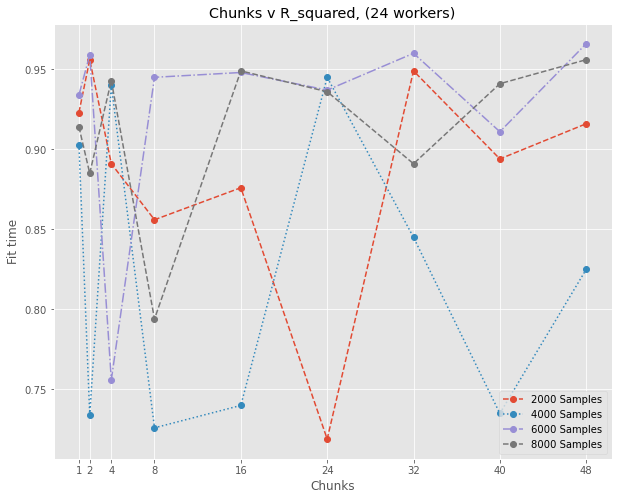

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,3],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,3], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,3], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,3], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v R_squared, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# Speed Ups

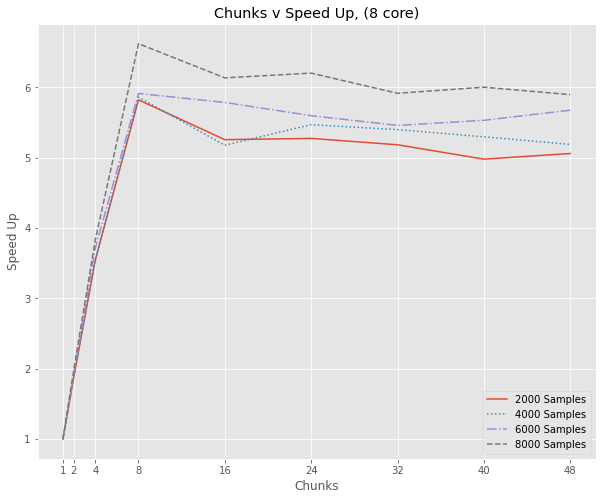

In [18]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[0].fit_time / data2000.fit_time, label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[0].fit_time / data4000.fit_time, ':', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[0].fit_time / data6000.fit_time, '-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[0].fit_time / data8000.fit_time, '--', label='8000 Samples')
plt.title('Chunks v Speed Up, (8 core)')
plt.xticks(data2000.index)
plt.xlabel('Chunks')
plt.ylabel('Speed Up')
plt.legend()

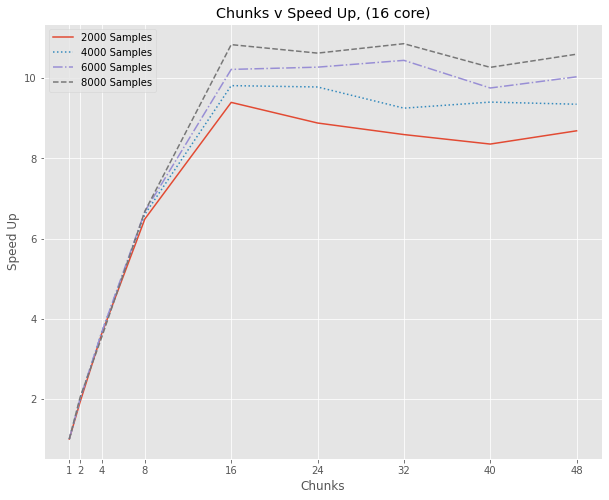

In [19]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_16.index, data2000_16.iloc[0].fit_time / data2000_16.fit_time, label='2000 Samples')
plt.plot(data4000_16.index, data4000_16.iloc[0].fit_time / data4000_16.fit_time, ':', label='4000 Samples')
plt.plot(data6000_16.index, data6000_16.iloc[0].fit_time / data6000_16.fit_time, '-.', label='6000 Samples')
plt.plot(data8000_16.index, data8000_16.iloc[0].fit_time / data8000_16.fit_time, '--', label='8000 Samples')
plt.title('Chunks v Speed Up, (16 core)')
plt.xticks(data2000.index)
plt.xlabel('Chunks')
plt.ylabel('Speed Up')
plt.legend()

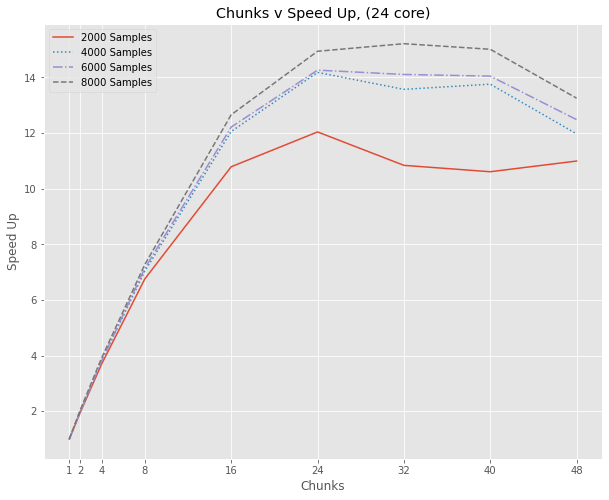

In [20]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[0].fit_time / data2000_24.fit_time, label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[0].fit_time / data4000_24.fit_time, ':', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[0].fit_time / data6000_24.fit_time, '-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[0].fit_time / data8000_24.fit_time, '--', label='8000 Samples')
plt.title('Chunks v Speed Up, (24 core)')
plt.xticks(data2000.index)
plt.xlabel('Chunks')
plt.ylabel('Speed Up')
plt.legend()